# CFD Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# CODE STATUS:
# 9/20/22, 8:40 PM: problem 1 is completed. Working on problem 2 part a. 
# The code to evaluate sigma and the cutoff for sigma=1 results in 0.47 being chosen as the max timestep for explicit euler, which is correct for tk = 15.
# Cannot plot implicit Euler --> not sure why? 
# Have not yet coded sigma for RK4
# Need to write the plotting and the decomposition of solver into the component parts as its own function and apply to problem 2
# Then, figure out how to modify the solver to accommodate second order equations. This one has different time steps and different methods --> might be easier to rewrite, rather than modify? Not sure.

In [110]:
def expEuler(g,dt,xik,tk):
    xik1 = xik + dt*g(xik,tk)
    return xik1

def impEulerP1(g,dt,xik,tk):
    xik1 = xik / (1 + 2 * dt)
    return xik1

def RK2(g,dt,xik,tk):
    K0 = g(xik,tk)
    K1 = g(xik+dt*K0/2,tk+dt/2)
    xik1 = xik + dt*K1
    return xik1

def RK4(g,dt,xik,tk):
    K0 = g(xik,tk)
    K1 = g(xik+dt*K0/2,tk+dt/2)
    K2 = g(xik+dt*K1/2,tk+dt/2)
    K3 = g(xik+dt*K2,tk+dt)
    xik1 = xik + (K0+2*K1+2*K2+K3)*dt/6
    return xik1

def plot_vals(x1, y1, y2, y3, y4, tvec, exacty, logscale = False, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(15,5))
    axes_internal = plt.gca()
    if logscale: 
        # axes_internal.set_yscale('log')
        axes_internal.set_xscale('log')
    if xlabel: axes_internal.set_xlabel(xlabel)
    if ylabel: axes_internal.set_ylabel(ylabel)
    if title: plt.title(title)
    plt.plot(x1,y1, label = 'Explicit Euler')
    if y2.any(): plt.plot(x1,y2, label = 'Implicit Euler')
    if y3.any(): plt.plot(x1,y3, label = 'RK2')
    if y4.any(): plt.plot(x1,y4, label = 'RK4')
    if exacty.any(): plt.plot(tvec,exacty, label = 'Exact Solution')
    plt.legend()
    plt.show()
    
    
def plot_methods(x1, y1, x2, y2, x3, y3, tvec, exacty, logscale = False, xlabel='time t (s)', ylabel='Solution Variable y', title=''):
    plt.figure(figsize=(15,5))
    axes_internal = plt.gca()
    if logscale: 
        # axes_internal.set_yscale('log')
        axes_internal.set_xscale('log')
    axes_internal.set_xlabel(xlabel)
    axes_internal.set_ylabel(ylabel)
    if title: plt.title(title)
    plt.plot(x1,y1, label = 'dt=0.1')
    plt.plot(x2,y2, label = 'dt = 0.5')
    plt.plot(x3,y3, label = 'dt = 1.0')
    plt.plot(tvec,exacty, label = 'Exact Solution')
    plt.legend(loc = 'upper right')
    plt.show()


# def plot_func_old(func, x=np.linspace(0,5,3001), logscale=False, ylim=[], xlabel='', ylabel=''):
#     y = np.vectorize(func)(x)
#     plt.figure(figsize=(5,5))
#     axes_internal = plt.gca()
#     if logscale: axes_internal.set_yscale('log')
#     if len(ylim) == 2: axes_internal.set_ylim(ylim)
#     if xlabel: axes_internal.set_xlabel(xlabel)
#     if ylabel: axes_internal.set_ylabel(ylabel)
#     plt.title(func.__name__)
#     plt.plot(x,y)
#     plt.show()

In [72]:
def solver(g,xi0,tmin,tmax,exact,tvec = [0.1, 0.5, 1.0], plot=True):
    solutionvals = []
    texact = np.arange(tmin,tmax,0.1)
    exactvals = exact(texact)
    for dt in tvec:
        numvals = math.ceil(abs((tmax-tmin)/dt))
        vals = np.zeros((numvals, 5))
        vals [:,0] = np.linspace(tmin,tmax,numvals)
        truedt = vals[1,0] - vals[0,0]
        vals[0,1] = xi0
        vals[0,2] = xi0
        vals[0,3] = xi0
        vals[0,4] = xi0

        # for i in
        
        for i in np.arange(0,numvals-1):
            tval = vals[i,0] # 0 is tvals
            vals[i+1,1] = expEuler(g,dt,vals[i,1],tval) # 1 is exp Euler
            vals[i+1,2] = impEulerP1(g,dt,vals[i,2],tval) # 2 is imp Euler
            vals[i+1,3] = RK2(g,dt,vals[i,3],tval) # 3 is RK2
            vals[i+1,4] = RK4(g,dt,vals[i,4],tval) # 4 is RK4
        if plot:
            plot_vals(vals[:,0],vals[:,1],vals[:,2],vals[:,3],vals[:,4],texact,exactvals,logscale = False)
            print("true step size t =",truedt)
        solutionvals.append(vals)
    return [solutionvals,texact,exactvals]
        

# the function oscillates when the amplification factor sigma is negative -- this means that each successive step will be the opposite sign to the one before it.
# sigma >=0 is the requirement for the system to not oscillate

# stable for delta t


In [49]:

# Solver code to plot each solver together, rather than each timestep together
def solverV2(g,xi0,tmin,tmax,exact,tvec = [0.1, 0.5, 1.0]):
    exactt = np.arange(tmin,tmax,0.1)
    exactvals = exact(exactt)
    
    for i in np.arange(0,3):
        #0 = explicit euler
        #1 = implicit euler
        #2 = RK2
        #3 = RK3
        if i == 0:
            method = expEuler
        elif i == 1:
            method = impEulerP1
        elif i ==2:
            method = RK2
        else: # i==3
            method = RK4
        
        
        numvals = math.ceil(abs((tmax-tmin)/dt))
        vals = np.zeros((numvals, len(tvec)+1))
        # a column for tvals and a column for each each time step size
        vals[:,0] = np.linspace(tmin,tmax,numvals+1)
        vals[0,1] = xi0
        vals[0,2] = xi0
        vals[0,3] = xi0
        vals[0,4] = xi0
        
        
        truedt = vals[1,0] - vals[0,0]
        for dt in tvec:
            for i in np.arange(0,numvals):
                # step through the process
                tval = vals[i,0]
                vals[i+1,1] = expEuler(g,dt,vals[i,1],tval)
                vals[i+1,2] = impEulerP1(g,dt,vals[i,2],tval)
                vals[i+1,3] = RK2(g,dt,vals[i,3],tval)
                vals[i+1,4] = RK4(g,dt,vals[i,4],tval)
        
        plot_vals(vals[:,0],vals[:,1],vals[:,2],vals[:,3],vals[:,4],tvec,exactvals,logscale = False)

        print("true step size t =",truedt)

# # the function oscillates when the amplification factor sigma is negative -- this means that each successive step will be the opposite sign to the one before it.
# # sigma >=0 is the requirement for the system to not oscillate

# # stable for delta t

In [50]:
# Problem 1
def g1(y,t):
    return -2*y

def exact1(t):
    return 4*np.exp(-2*t)


# Problem 2
def g2(y,t):
    return -y*(2+0.01*t**2)

def exact2(t):
    return 4*np.exp(-t*(2+0.01/3*t*t))



In [117]:
# Problem 2a: draw a plot of sigma vs tk, delta t, and eliminate all delta t's for which sigma is greater than 1
def testfunc(tk,dt):
    sigma = 0.5 + 2*dt
    return abs(sigma)

def magsigmaexpEuler(tk,dt):
    sigma = 1 - dt * (2 + 0.01*tk**2)
    return abs(sigma)

def magsigmaimpEuler(tk,dt):
    sigma = 1/(1 + dt*(2 + 0.01*(tk+dt)**2))

def magsigma2RK2(tk,dt):
    sigma = 1 - dt * (2 + 0.01 * ((tk + dt/2)**2) ) * (1 - dt/2*(2 + 0.01*tk**2))
    return abs(sigma)

# def sigma2RK4(tk,dt)



def maxdt(abssigma):
    tmin = 0
    tmax = 15
    dt = 0.05
    numt = math.ceil(abs((tmax-tmin)/dt))

    dtmin = 0.2
    dtmax = 1.0
    dtdt = 0.01
    numdt = math.ceil(abs((dtmax-dtmin)/dtdt))


    tk = np.arange(tmin,tmax,dt)
    dt = np.arange(dtmin,dtmax,dtdt)



    # make matrix of sigma values (tk varies with rows, dt varies with columns), and then plot those vs t,dt
    # we want to start from the smallest time step, and go to the largest
    # if any time step size yields any sigma greater than or equal to 1, then we say the maximum time step lies within the closed interval of those two time steps
    vals = np.zeros((numt,numdt))

    for i in np.arange(0,numt):
        for j in np.arange(0,numdt):
            vals[i,j] = abssigma(tk[i],dt[j])
    vals = np.floor(vals)
    indices = np.nonzero(vals)
    indices = indices[1]
    minindex = min(indices)
    maxdt = dt[minindex-1] # take the time step size right before the one that made the magnitude >1
    print(maxdt)
    
    TK, DT = np.meshgrid(tk,dt)
    Z = abssigma(TK,DT)
    print(Z)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.contour3D(TK,DT,Z,50, cmap='binary')
    # ax.plot_surface(TK, DT, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax.set_xlabel('TK')
    ax.set_ylabel('DT')
    ax.set_zlabel('Sigma')
    return(maxdt)

0.24000000000000005
[[0.9  0.9  0.9  ... 0.9  0.9  0.9 ]
 [0.92 0.92 0.92 ... 0.92 0.92 0.92]
 [0.94 0.94 0.94 ... 0.94 0.94 0.94]
 ...
 [2.44 2.44 2.44 ... 2.44 2.44 2.44]
 [2.46 2.46 2.46 ... 2.46 2.46 2.46]
 [2.48 2.48 2.48 ... 2.48 2.48 2.48]]
0.47000000000000025
[[0.6        0.599995   0.59998    ... 0.158955   0.15598    0.152995  ]
 [0.58       0.57999475 0.579979   ... 0.11690275 0.113779   0.11064475]
 [0.56       0.5599945  0.559978   ... 0.0748505  0.071578   0.0682945 ]
 ...
 [0.94       0.94002425 0.940097   ... 3.07906825 3.093497   3.10797425]
 [0.96       0.9600245  0.960098   ... 3.1211205  3.135698   3.1503245 ]
 [0.98       0.98002475 0.980099   ... 3.16317275 3.177899   3.19267475]]
0.47000000000000025
[[0.679984   0.679965   0.67994    ... 0.50917966 0.5087085  0.50824475]
 [0.66818171 0.66816125 0.66813469 ... 0.50316298 0.50280067 0.50244706]
 [0.65677924 0.65675728 0.65672917 ... 0.4989243  0.49868355 0.49845287]
 ...
 [0.94173155 0.94174026 0.94179466 ... 5.387

0.47000000000000025

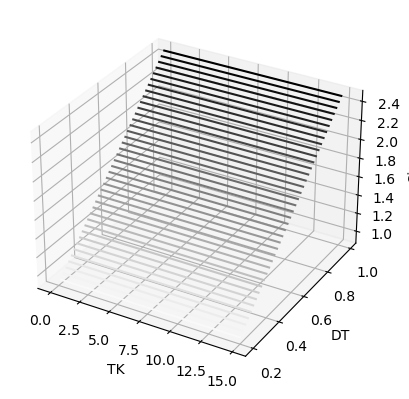

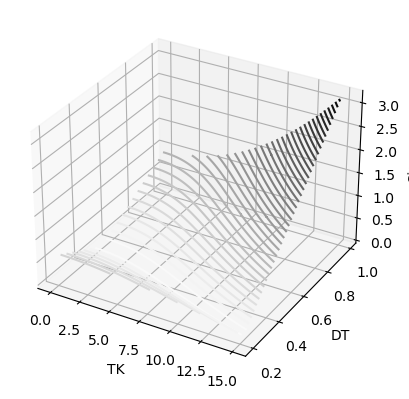

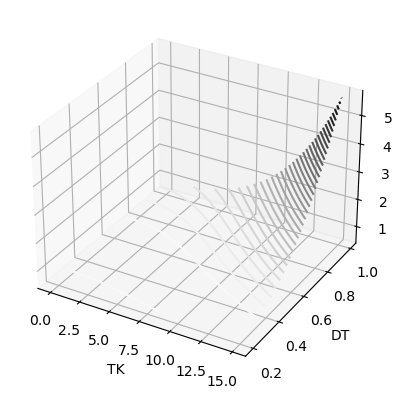

In [121]:
maxdt(testfunc)
maxdt(magsigmaexpEuler)
# maxdt(magsigmaimpEuler)
maxdt(magsigma2RK2)y3
# maxdt(magsigma2RK4)

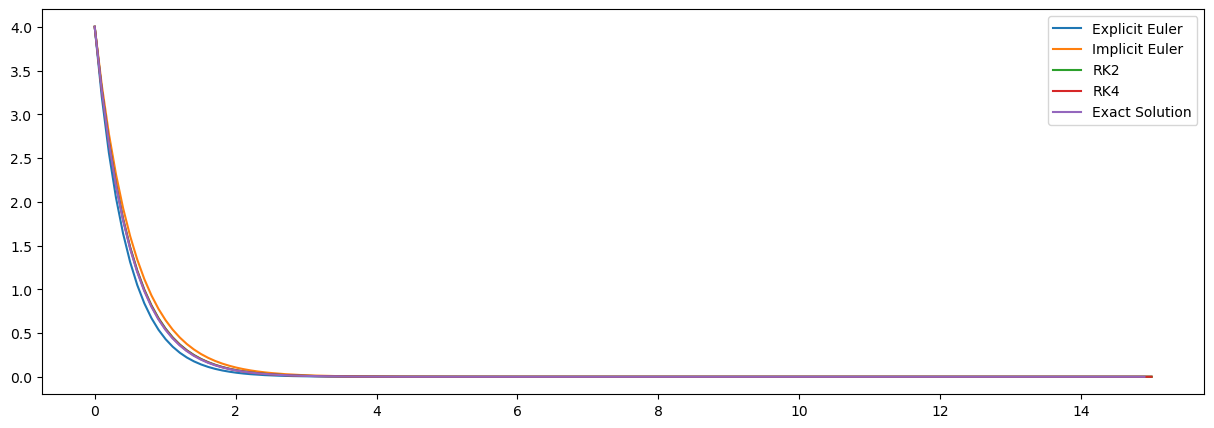

true step size t = 0.10067114093959731


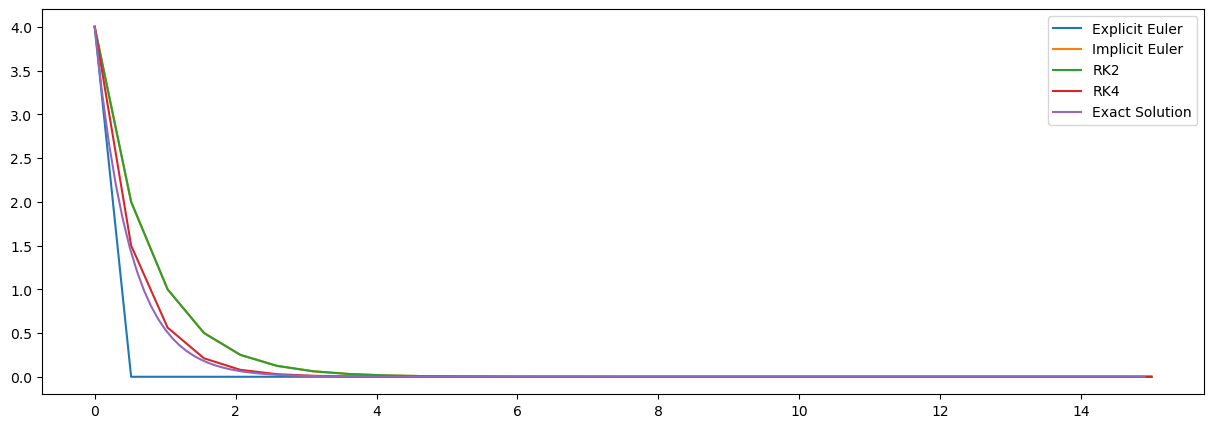

true step size t = 0.5172413793103449


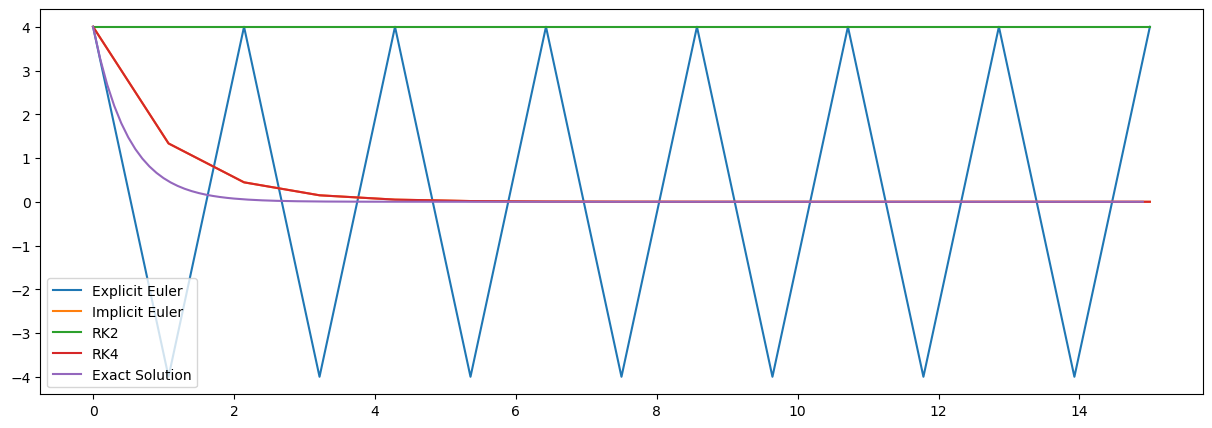

true step size t = 1.0714285714285714


In [111]:
test = solver(g1,xi0=4,tmin=0,tmax=15,exact=exact1,plot=True)

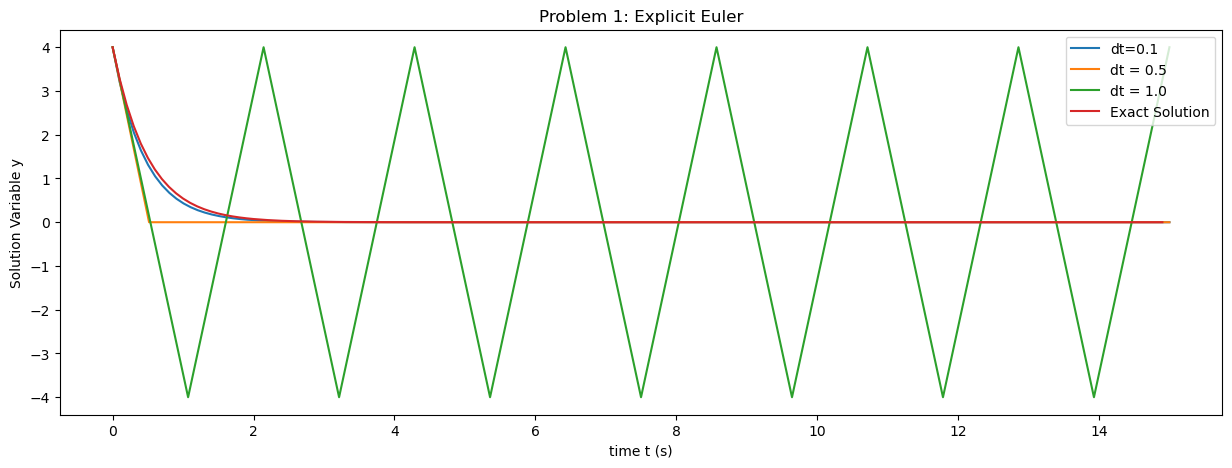

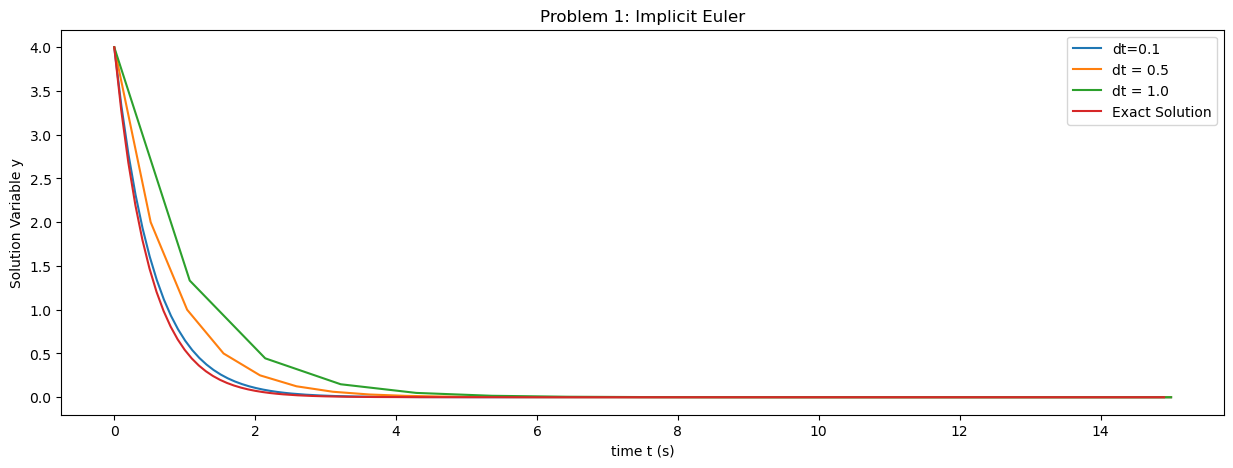

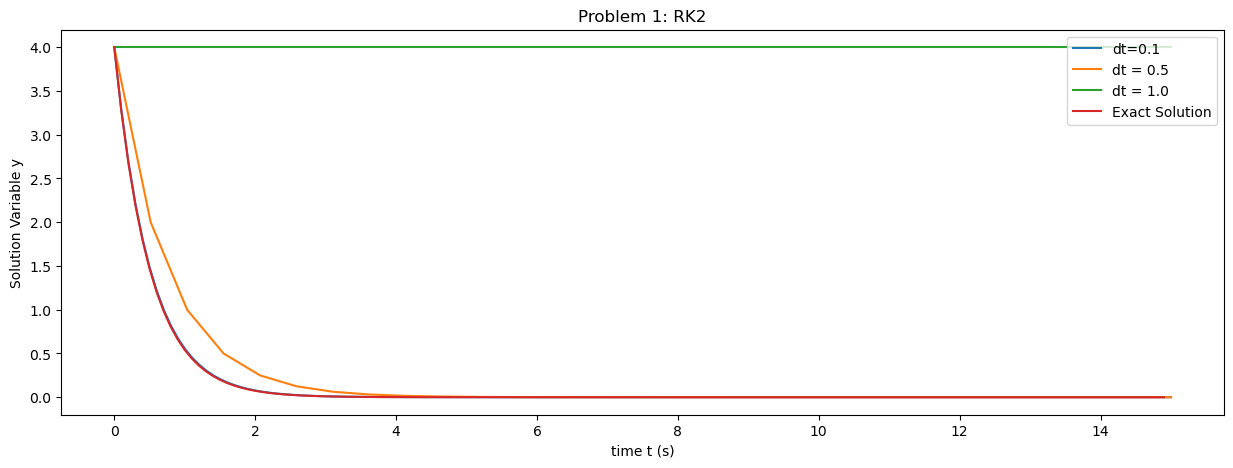

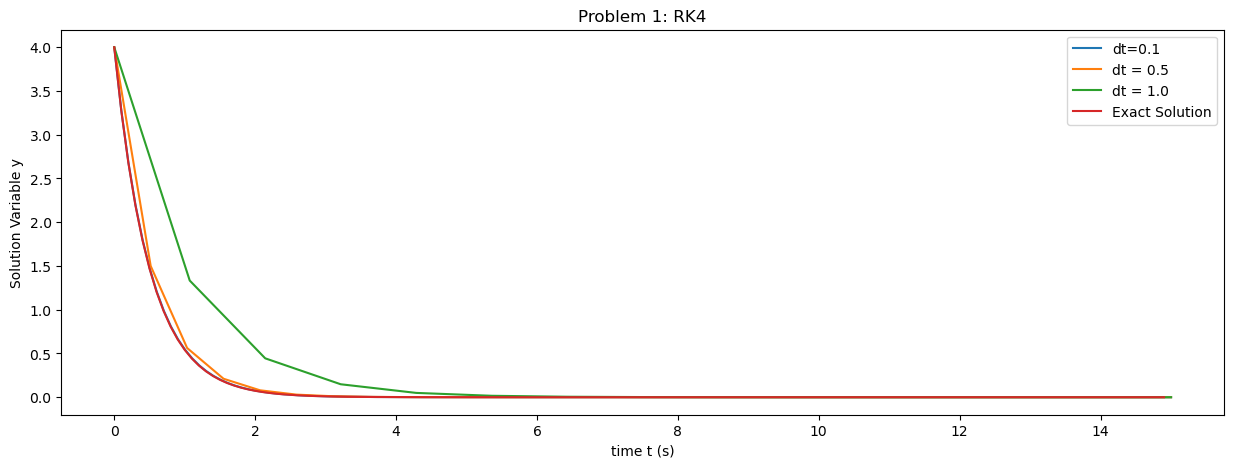

In [112]:

# def FullSoln(g,exact,tvec,
solutions = solver(g1,xi0=4,tmin=0,tmax=15,exact=exact1,tvec=[0.1,0.5,1.0],plot=False)
numsoln = solutions[0]
texact = solutions[1]
exactvals = solutions[2]
dt01 = numsoln[0] # dt = 0.1
dt05 = numsoln[1] # dt = 0.5
dt10 = numsoln[2] # dt = 1.0
#0 is tvals
#1 is expEuler
#2 is impEuler
#3 is RK2
#4 is RK4


# #Plot ExpEuler
plot_methods(dt01[:,0],dt01[:,1],dt05[:,0],dt05[:,1],dt10[:,0],dt10[:,1],texact,exactvals,title='Problem 1: Explicit Euler')
#Plot ImpEuler
plot_methods(dt01[:,0],dt01[:,2],dt05[:,0],dt05[:,2],dt10[:,0],dt10[:,2],texact,exactvals,title='Problem 1: Implicit Euler')
#Plot RK2
plot_methods(dt01[:,0],dt01[:,3],dt05[:,0],dt05[:,3],dt10[:,0],dt10[:,3],texact,exactvals,title='Problem 1: RK2')
#Plot RK4
plot_methods(dt01[:,0],dt01[:,4],dt05[:,0],dt05[:,4],dt10[:,0],dt10[:,4],texact,exactvals,title='Problem 1: RK4')

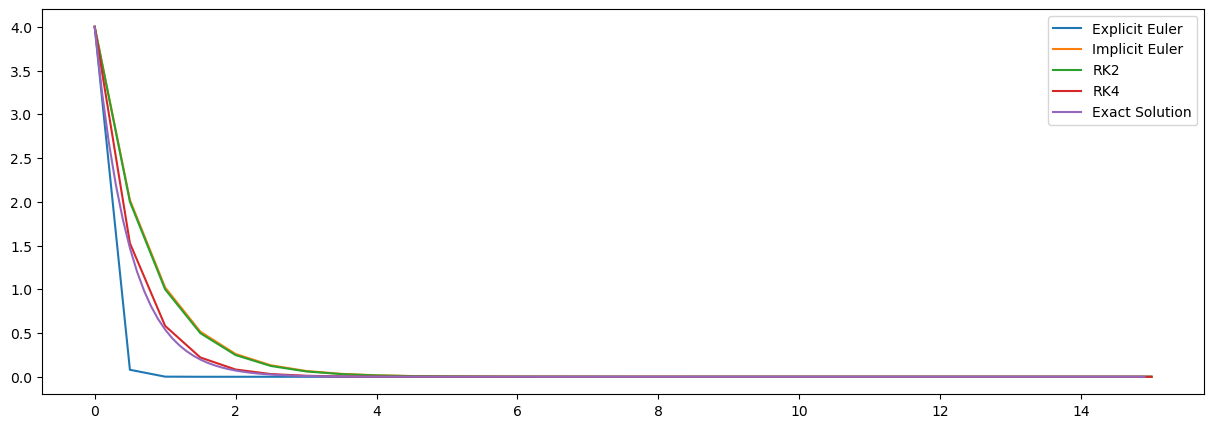

true step size t = 0.5


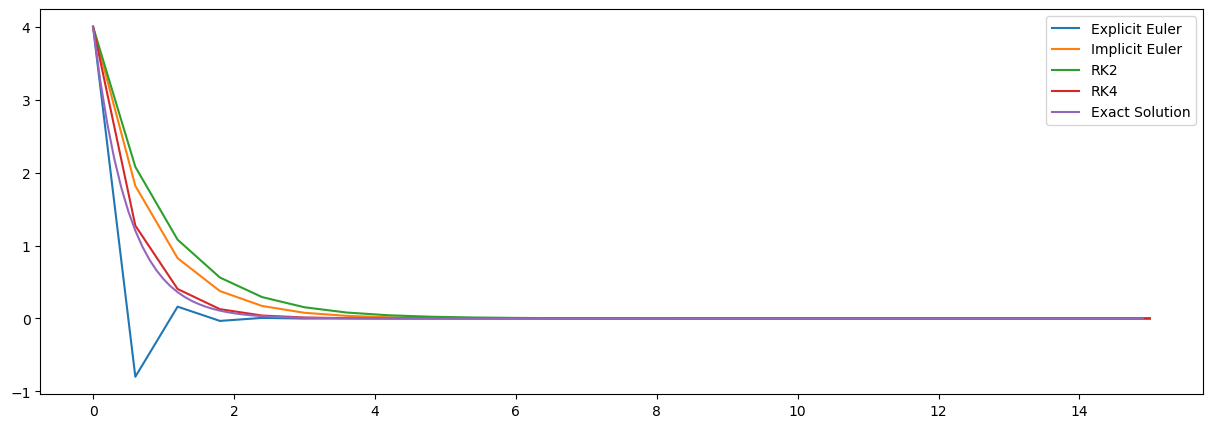

true step size t = 0.6


In [31]:
solver(g2,xi0=4,tmin=0,tmax=15,exact=exact2,tvec = [0.49, 0.6])

In [9]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [ ]:
vec = [1, 2, 3]
size(vec)

3